<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Feature-extraction-with-Shap/LSTM_Shap-values_samples%20ranked%20by%20LI_stripplot-boxplot_BLonly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('Shap values_LSTM_Stripplot-input - BLonly.csv')

In [4]:
# Display all data
dataset.head(56)

,Genes,Shap-values,Learner
0,Tnfaip3,0.002260,Bad -learner
1,Tnfaip3,0.002080,Bad -learner
2,Tnfaip3,0.002070,Bad -learner
3,Tnfaip3,-0.007290,Bad -learner
4,Tnfaip3,-0.007700,Bad -learner
5,Tnfaip3,-0.001460,Bad -learner
6,Tnfaip3,0.002160,Bad -learner
7,Tnfaip3,-0.002650,Bad -learner
8,Tnfaip3,0.002190,Bad -learner
9,Tnfaip3,0.002300,Bad -learner


In [5]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,Shap-values
count,754.000000
mean,-0.001429
std,0.011981
min,-0.062900
25%,-0.002305
50%,-0.000189
75%,0.001897
max,0.080800


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'whitegrid', font= 'sans-serif', font_scale=1.25)

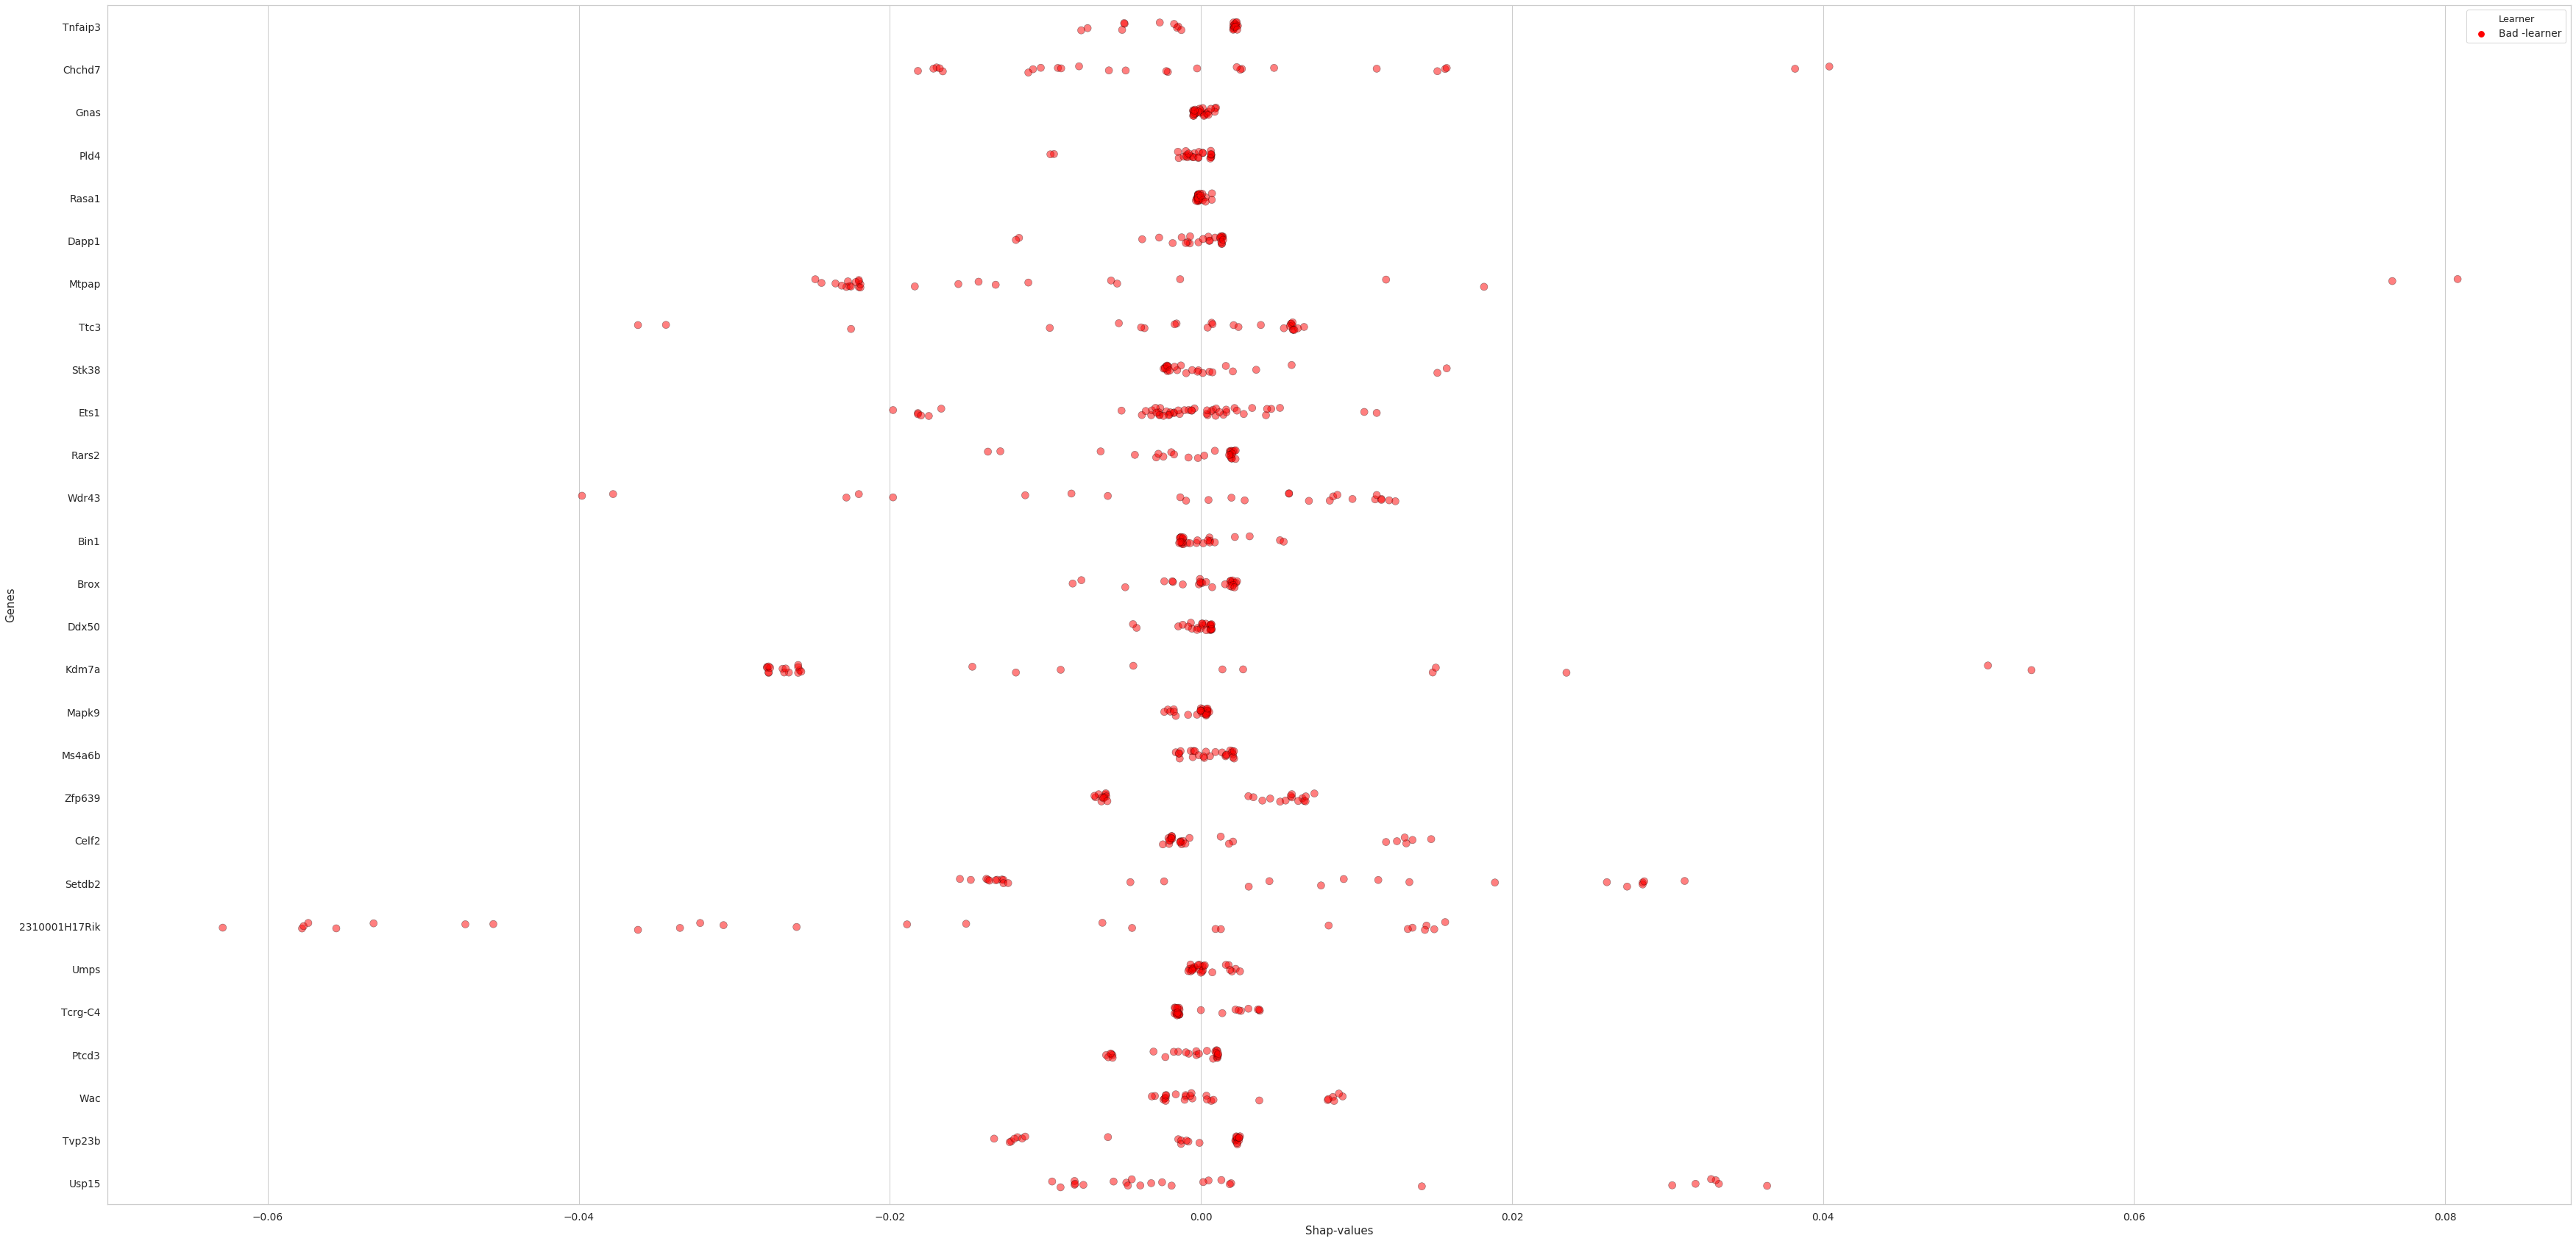

In [7]:
# Strip plot such that good and bad learners are visually-separate:
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(60,30))

# Create an array with the green and red colors
colors = ["#ff0000"]

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# Plotting the heatmap with the correct aspect ratio
sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.5, dodge=True, size = 10, edgecolor = 'black', alpha=0.50 )

#Save figure as svg
plt.savefig ('Strip-plot_shap_LSTM_BL_dodged.svg', format = 'svg')

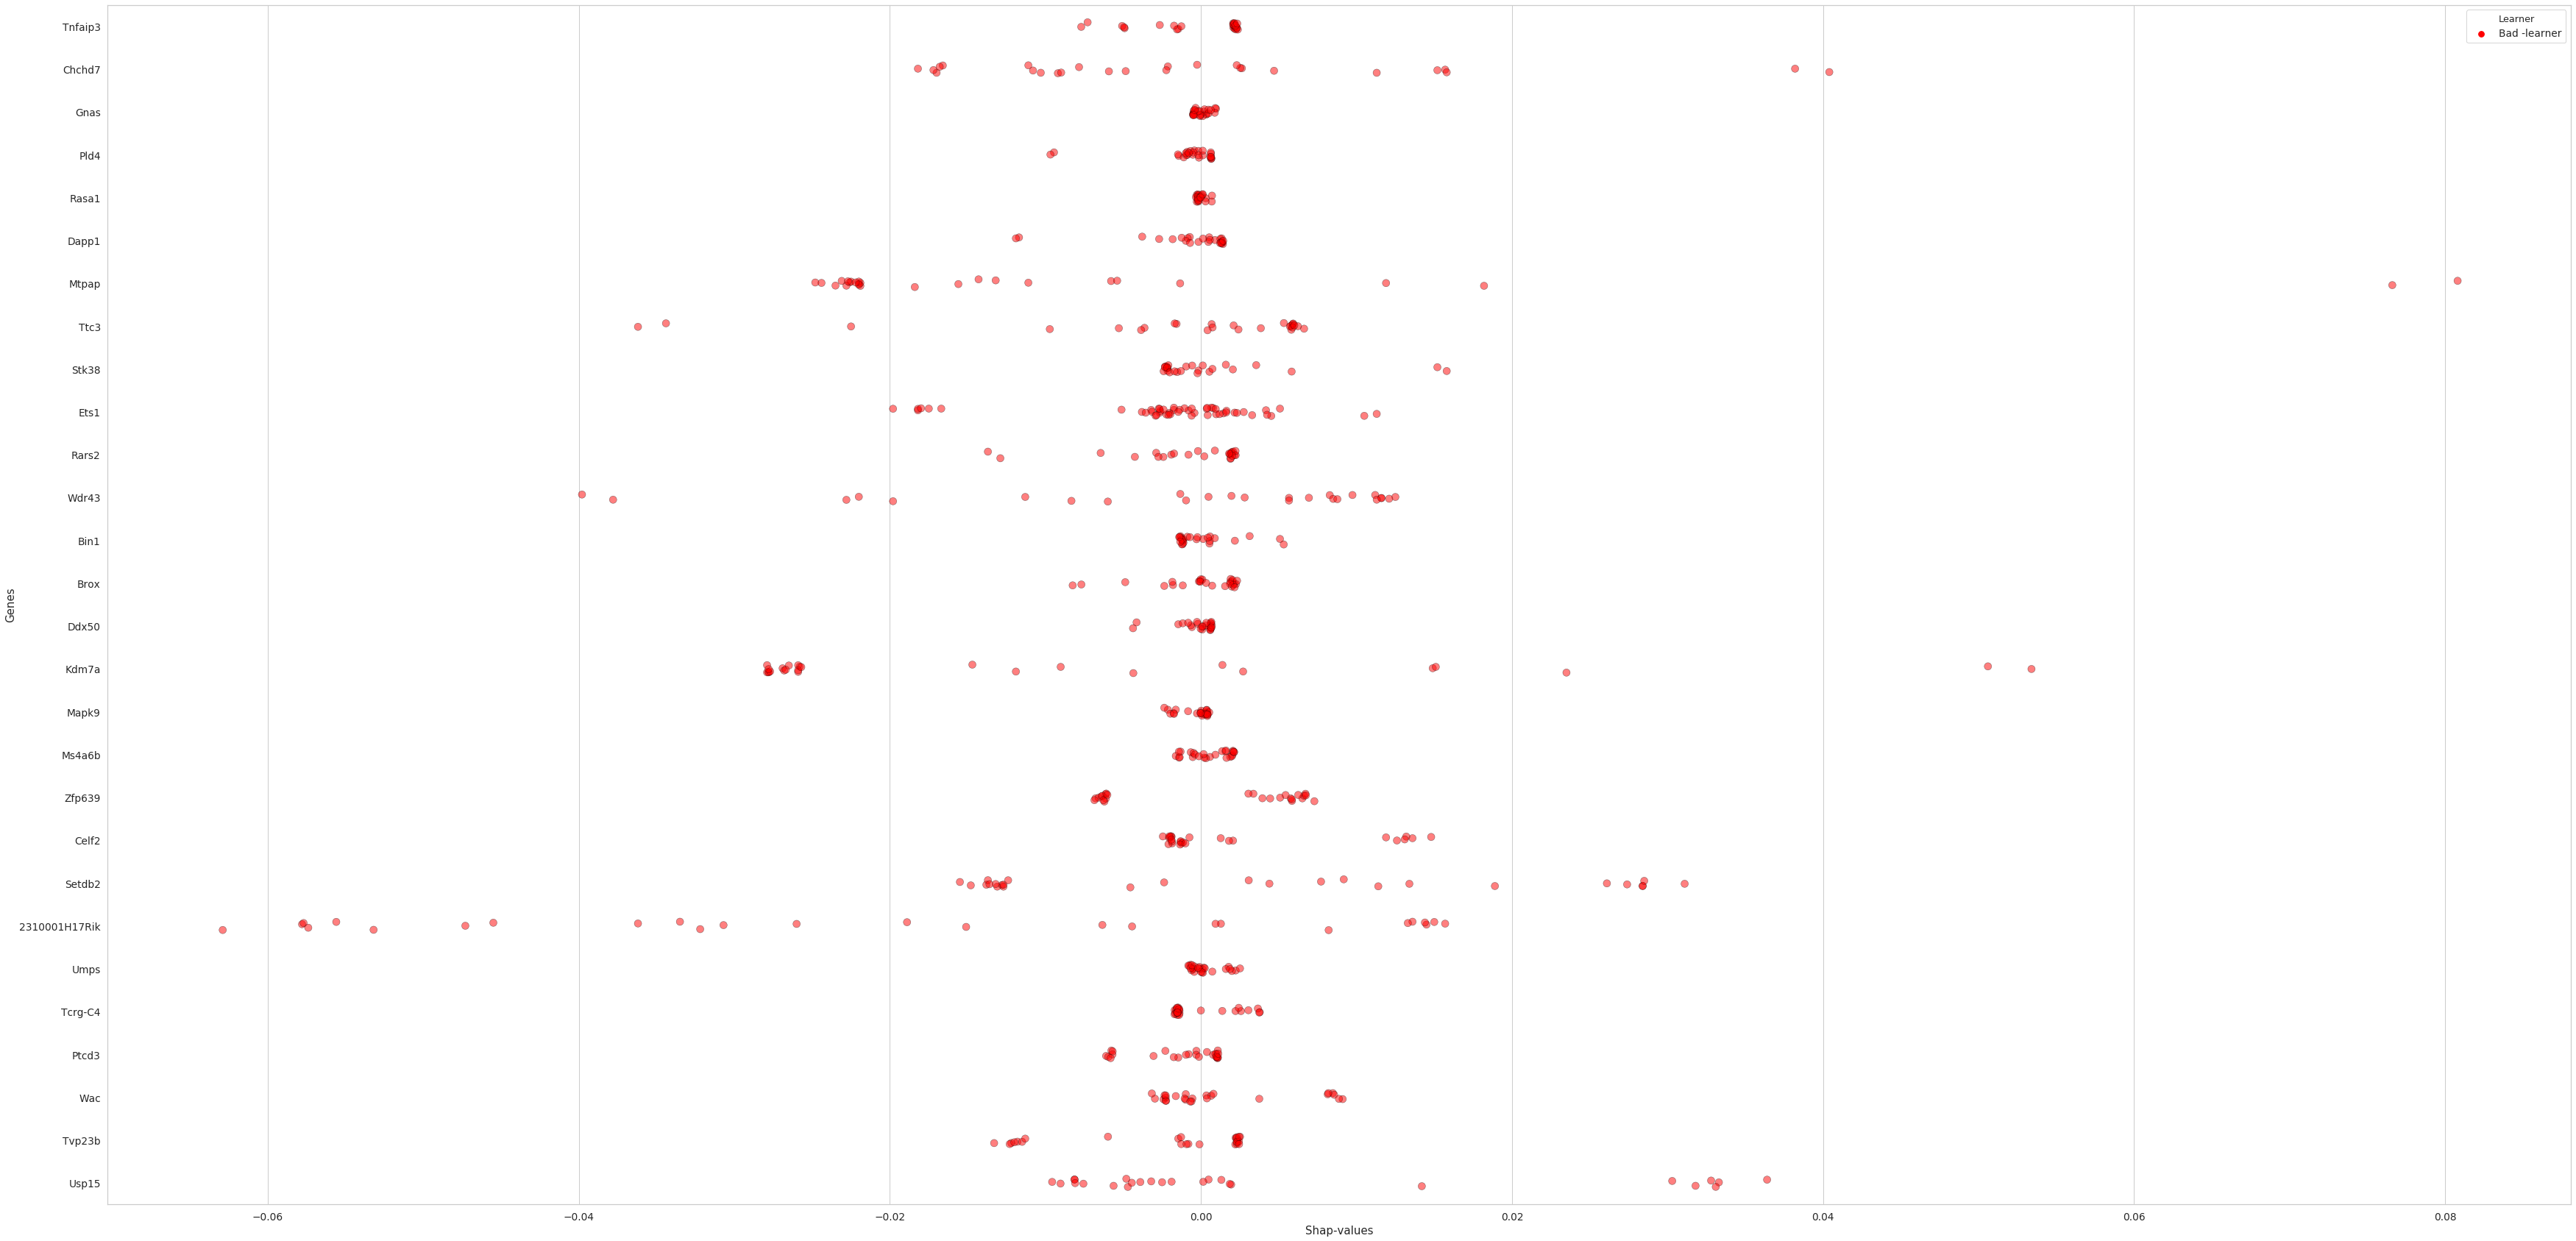

In [8]:
# Strip plot such that good and bad learners are NOT visually-separate:
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(60,30))

# Create an array with the green and red colors
colors = ["#ff0000"]

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# Plotting the heatmap with the correct aspect ratio
sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.5, dodge=False, size = 10, edgecolor = 'black', alpha=0.50 )

#Save figure as svg
plt.savefig ('Strip-plot_shap_LSTM_BL_NOT-dodged.svg', format = 'svg')

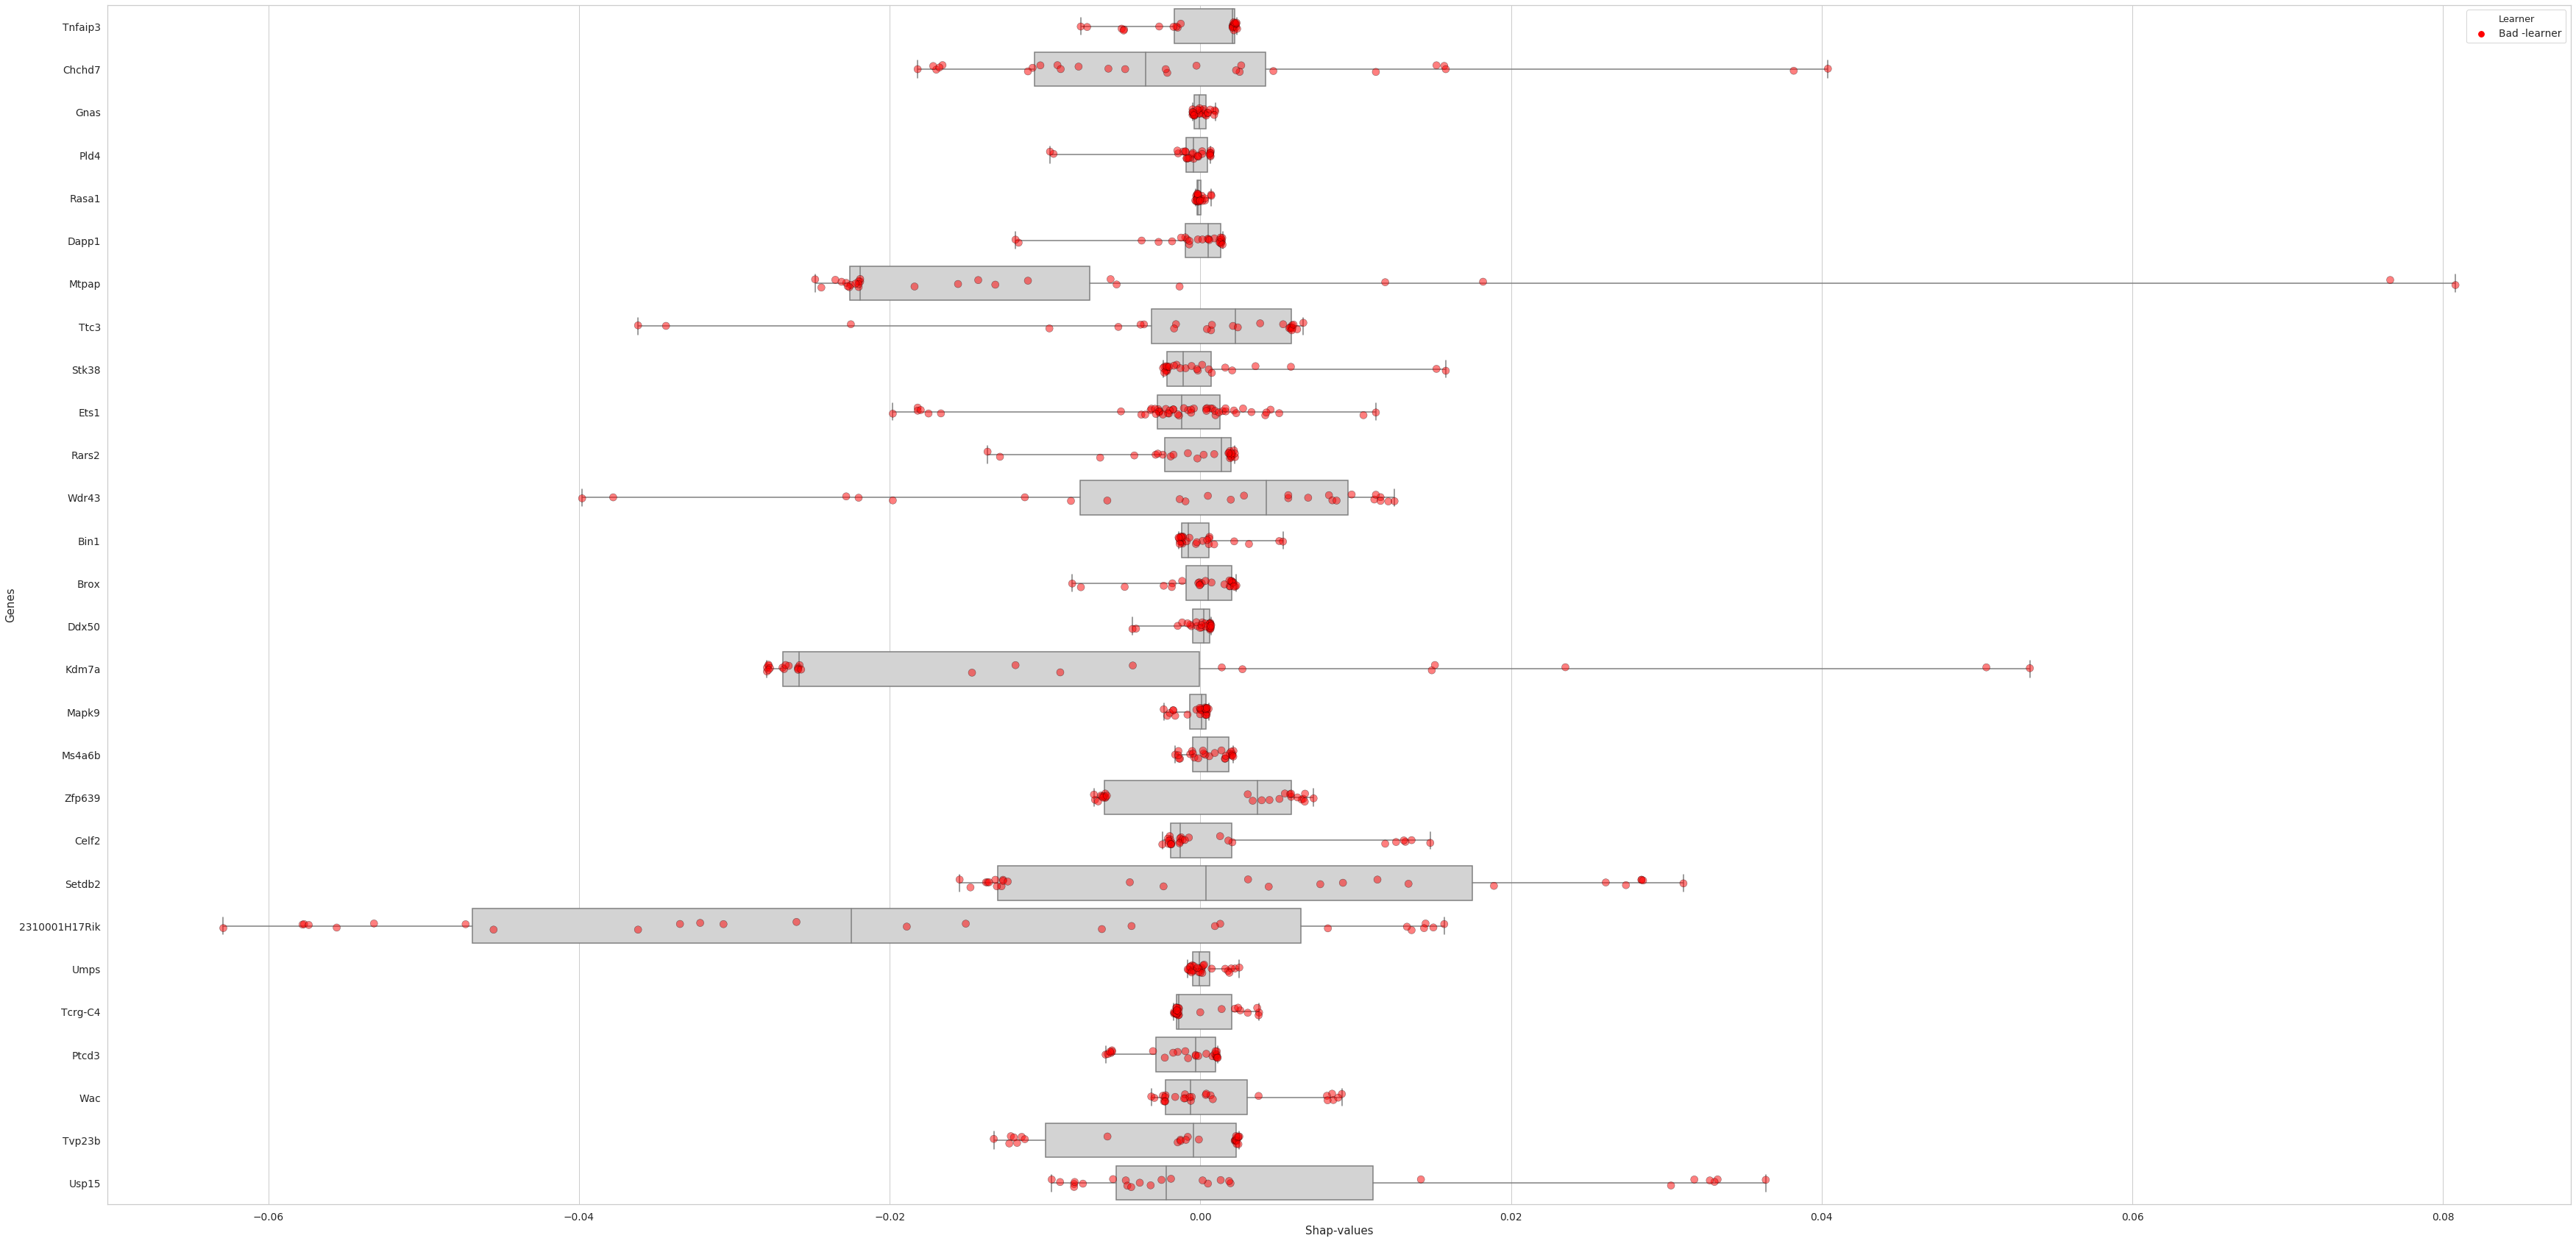

In [9]:
#Set up boxplot on top of non-dodged strip-plot
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(60,30))
ax = sns.boxplot(x='Shap-values', y='Genes', data=dataset, whis=np.inf, color='lightgrey' )
ax = sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.5, dodge=False, size = 10, edgecolor = 'black', alpha=0.50)

#Save figure as svg
plt.savefig ('Strip-plot_box-plot_shap_LSTM_BL_NOT-dodged.svg', format = 'svg')

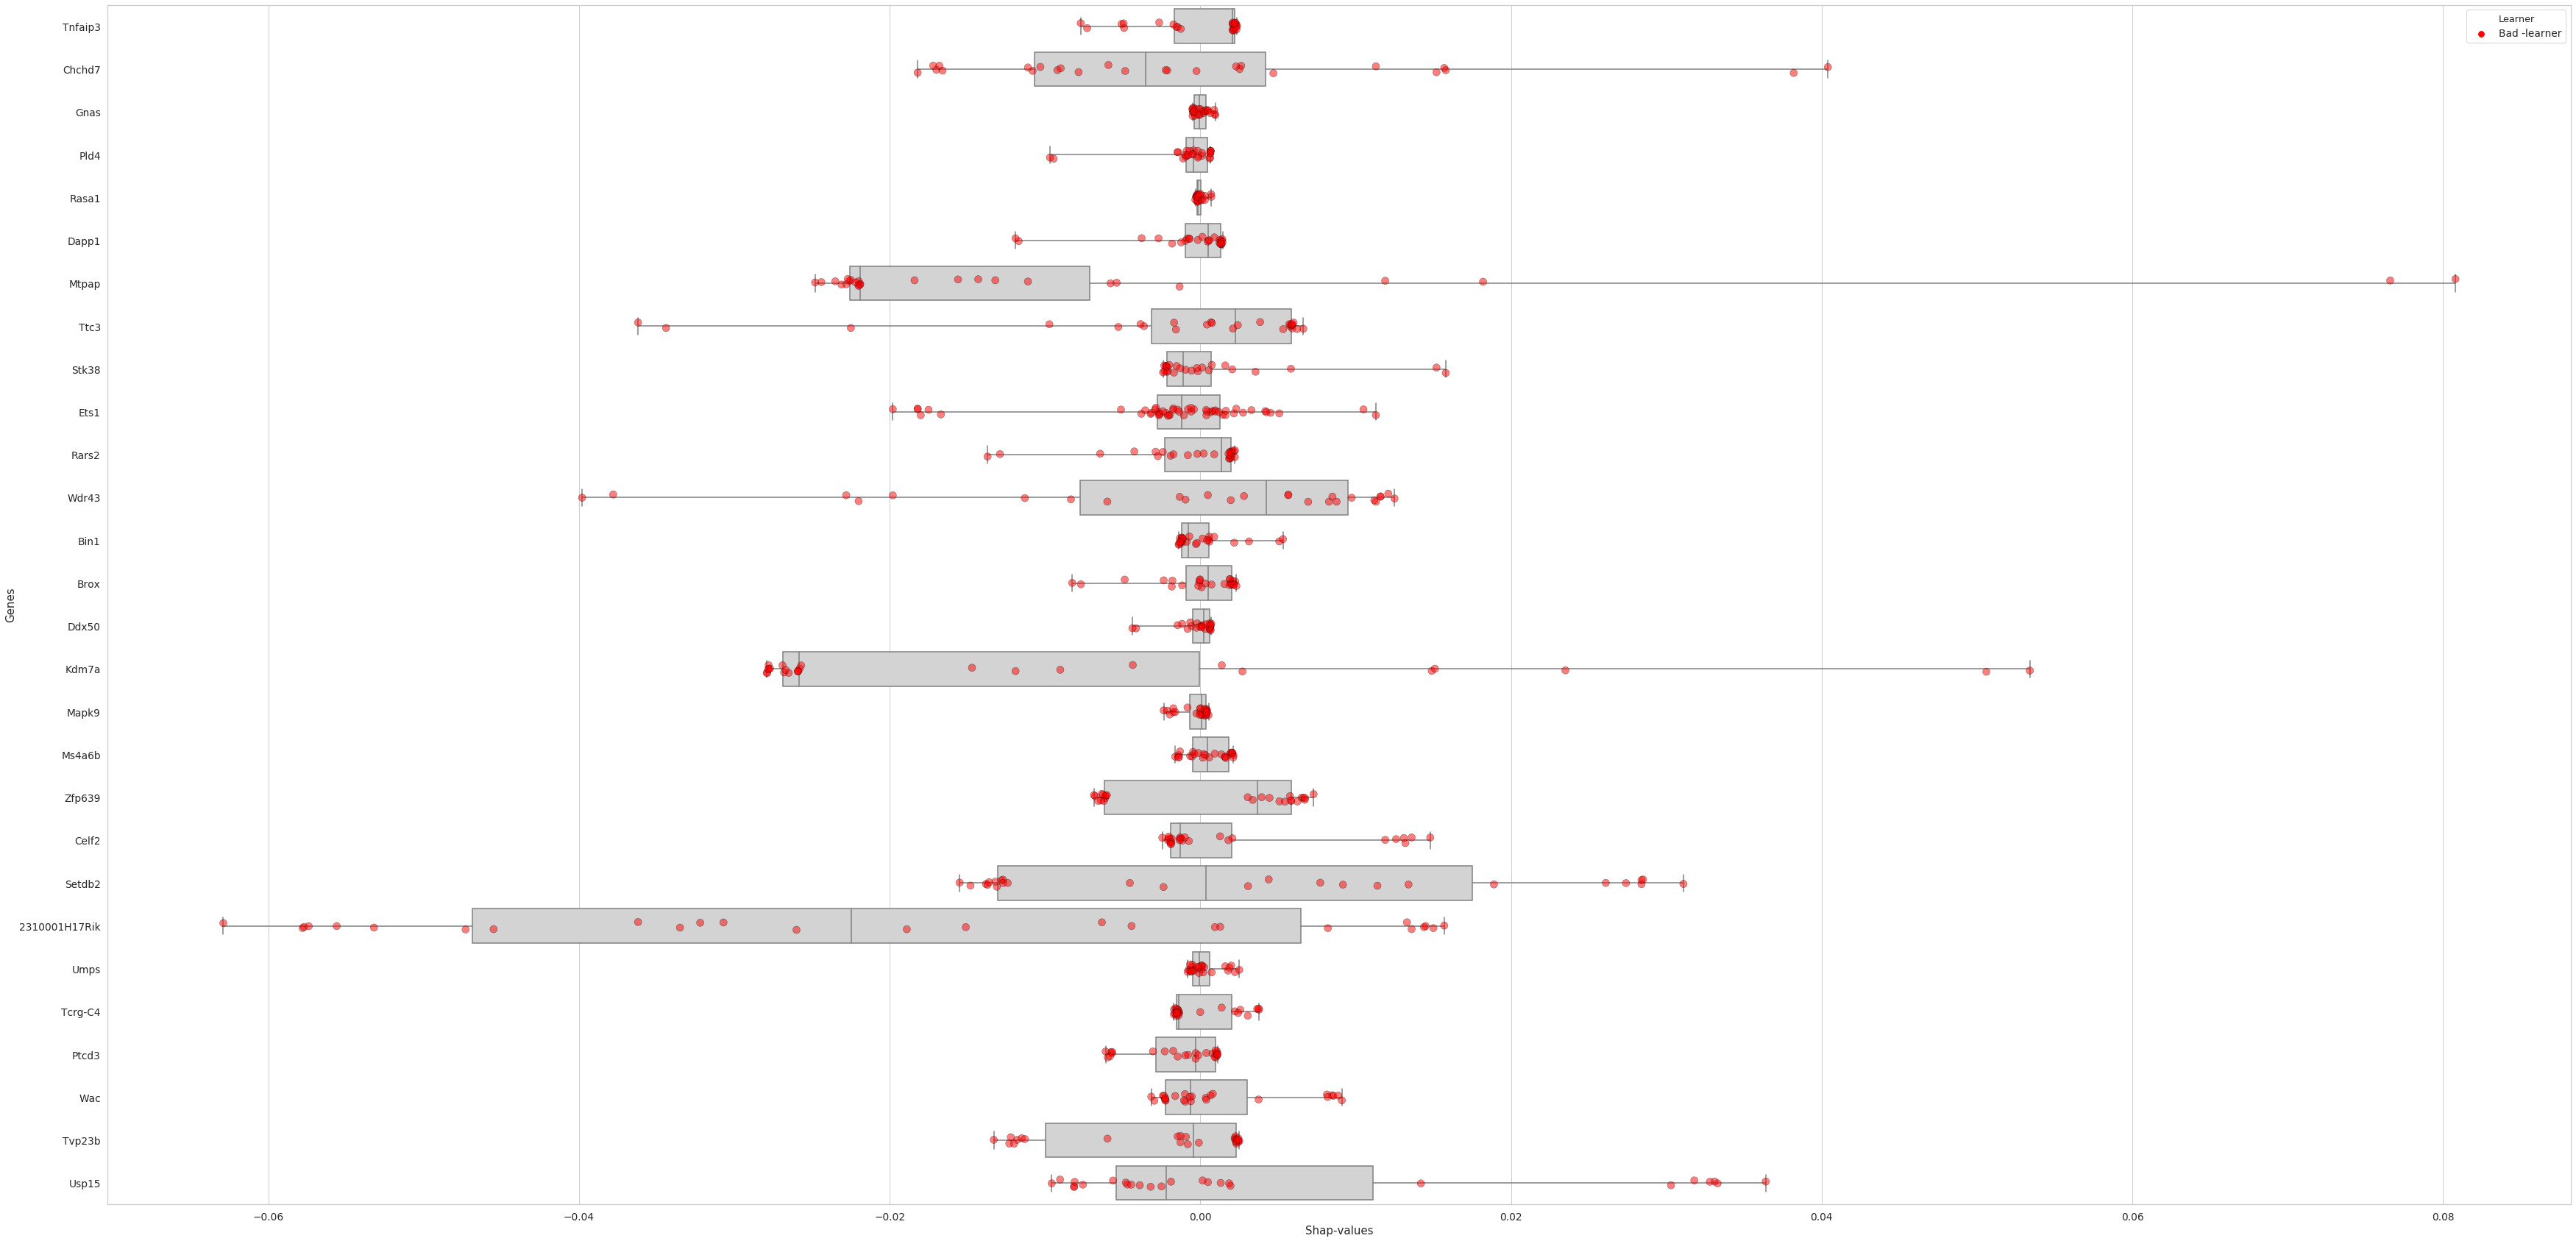

In [10]:
#Set up boxplot on top of dodged strip-plot
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(60,30))
ax = sns.boxplot(x='Shap-values', y='Genes', data=dataset, whis=np.inf, color='lightgrey' )
ax = sns.stripplot(x='Shap-values', y='Genes', hue='Learner', data=dataset, linewidth=0.5, dodge=True, size = 10, edgecolor = 'black', alpha=0.50)

#Save figure as svg
plt.savefig ('Strip-plot_box-plot_shap_LSTM_BL_dodged.svg', format = 'svg')